1) Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ds_cvd_w1.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


2. Normal Feature Engineering

1) Rename Blood Pressure COlumns

In [5]:
df = df.rename(columns={
    "ap_hi": "bp_hi",
    "ap_lo": "bp_lo"
})

2.2) Drop "id" column

In [6]:
df = df.drop(columns=["id"])

(2.3) Convert age into years

In [7]:
df["age"] = (df["age"] / 365).round().astype(int)

(2.4) Normalize "gender" column

In [8]:
df["gender"] = df["gender"].replace({1: 0, 2: 1})

3) Remove Outliers

1) Identify Outlier

In [9]:
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

numeric_cols = ["age", "height", "weight", "bp_hi", "bp_lo"]

for col in numeric_cols:
    lower, upper = iqr_bounds(df[col])
    print(f"{col}: lower={lower:.2f}, upper={upper:.2f}")

age: lower=33.00, upper=73.00
height: lower=142.50, upper=186.50
weight: lower=39.50, upper=107.50
bp_hi: lower=90.00, upper=170.00
bp_lo: lower=65.00, upper=105.00


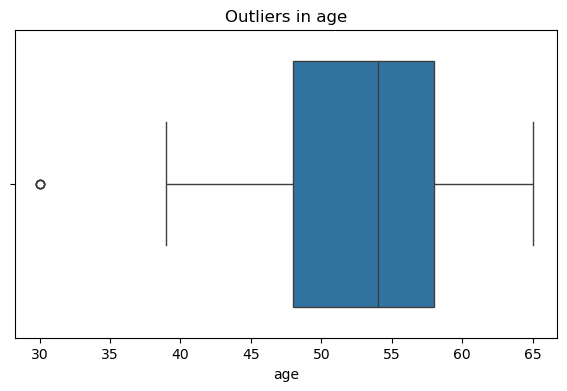

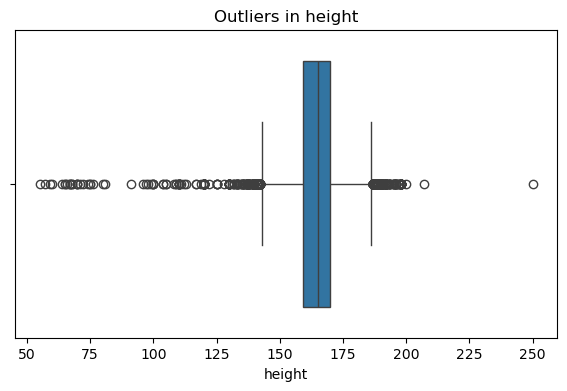

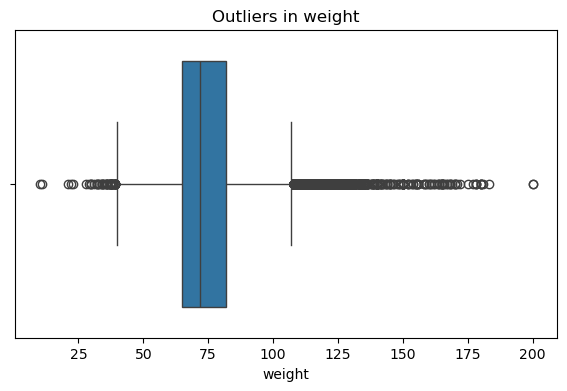

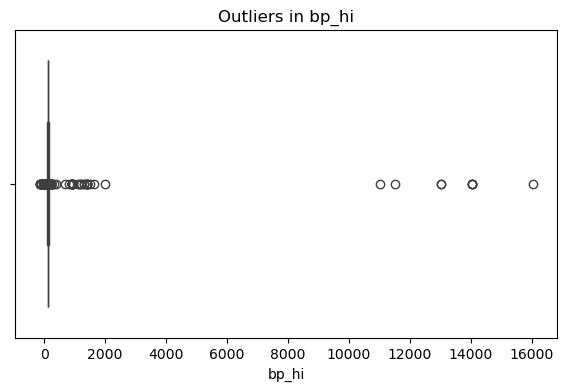

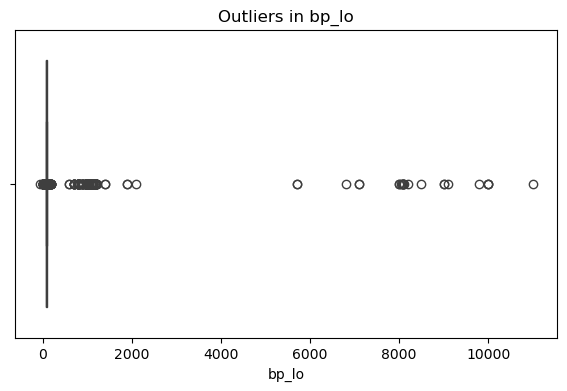

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [5]:
outlier_count = (df['weight'] > 110).sum()
print("Outliers (weight <20 ):", outlier_count)


Outliers (weight <20 ): 1247


2.) Remove Outlier

In [11]:
for col in numeric_cols:
    lower, upper = iqr_bounds(df[col])
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"{col}: removed {before - after} rows")

df.shape

age: removed 4 rows
height: removed 519 rows
weight: removed 1758 rows
bp_hi: removed 1309 rows
bp_lo: removed 3908 rows


(62502, 12)

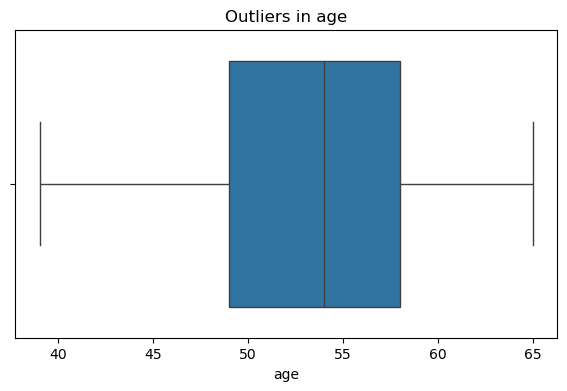

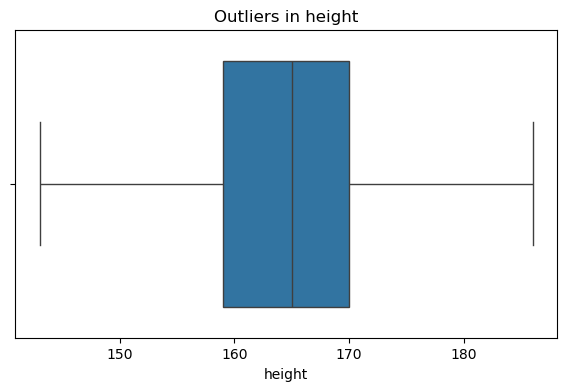

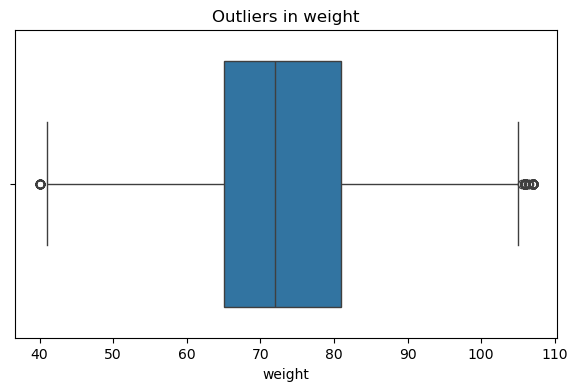

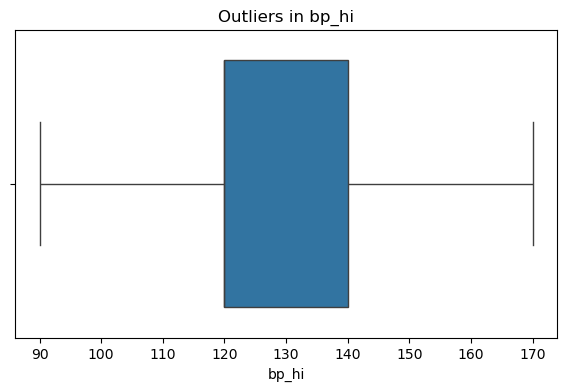

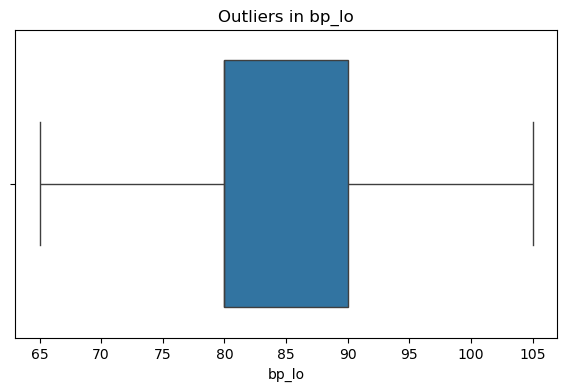

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

4.) Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape : {X_train.shape}")
print(f"Test Shape : {X_test.shape}")

Training Shape : (50001, 11)
Test Shape : (12501, 11)


5) Scalling Numerical Data

In [14]:
from sklearn.preprocessing import StandardScaler 
numeric_cols = ["age", "height", "weight", "bp_hi", "bp_lo"]

#StandardScaler()
scaler = StandardScaler()

#fit_transform()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

print('Scaled X_train_scaled_data_sample :')
X_train_scaled

Scaled X_train_scaled_data_sample :


array([[-0.35815343, -0.58684233,  0.2247422 , -0.44758787, -0.22050975],
       [ 0.68085369, -0.32133475, -0.66874582, -0.44758787, -0.22050975],
       [-1.69401973,  0.475188  , -0.50629346, -1.14844942, -1.52286125],
       ...,
       [ 1.57143122, -0.32133475,  0.87455167, -0.44758787, -0.22050975],
       [ 0.82928328,  0.475188  ,  2.49907535,  0.25327368, -0.22050975],
       [ 0.08713533,  0.475188  ,  0.38719457, -0.44758787, -0.22050975]])

5) Encoding Categorical Data

No need for encoding

(6) Save to CSV

In [15]:
df.shape

(62502, 12)

In [16]:
df.to_csv('cardio.csv')